# Principal Components Analysis

## PCA from Sklearn

In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
data_path  = "datasets/pizza.csv"

In [7]:
pizza_data = pd.read_csv(data_path)
pizza_data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


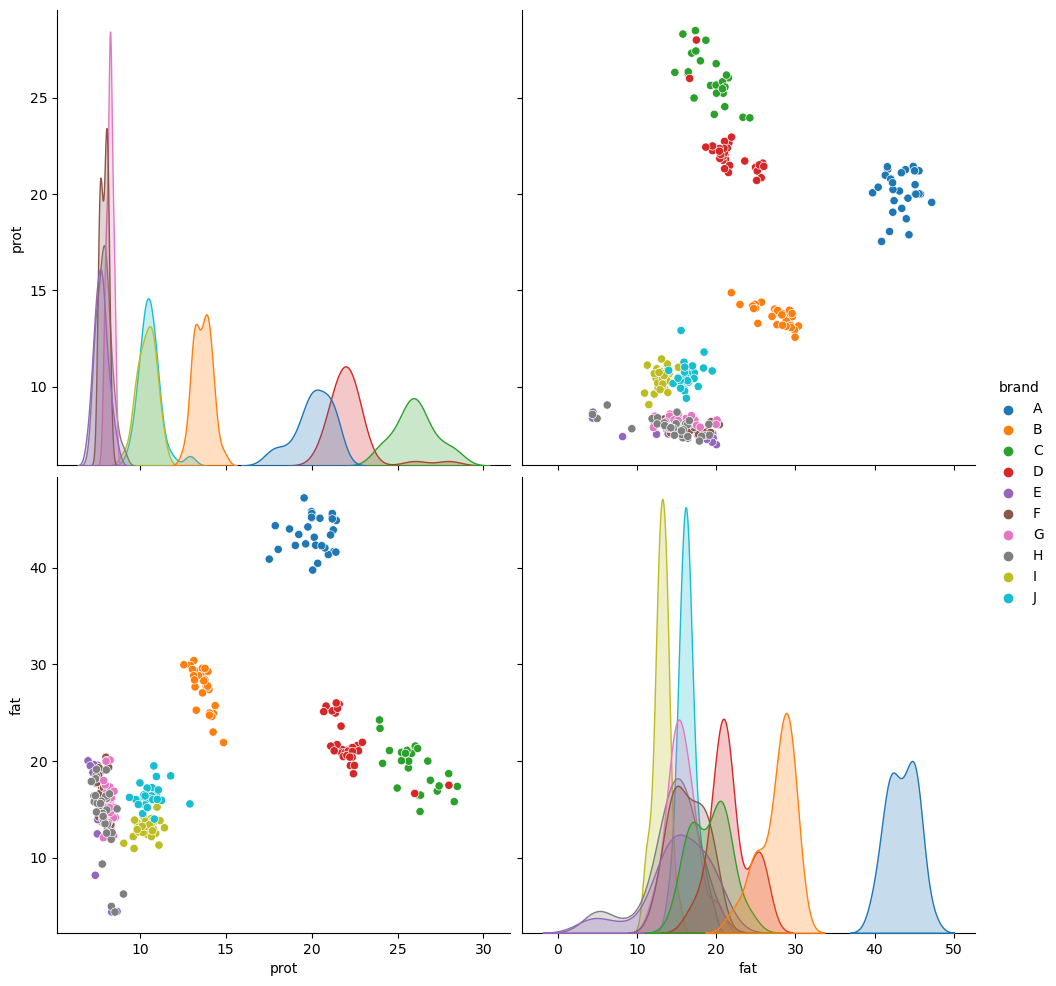

In [15]:
# colours = sb.color_palette("Dark2",10)
sb.pairplot(pizza_data[['prot','fat', 'brand']], 
             hue="brand", height=5)

In [17]:
pizza_data.drop("id", inplace=True, axis=1)

In [18]:
pizza_data.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [23]:
y = pizza_data["brand"]
X = pizza_data[pizza_data.columns[1:]]

print(y)
print(X)

0      A
1      A
2      A
3      A
4      A
      ..
295    J
296    J
297    J
298    J
299    J
Name: brand, Length: 300, dtype: object
      mois   prot    fat   ash  sodium   carb   cal
0    27.82  21.43  44.87  5.11    1.77   0.77  4.93
1    28.49  21.26  43.89  5.34    1.79   1.02  4.84
2    28.35  19.99  45.78  5.08    1.63   0.80  4.95
3    30.55  20.15  43.13  4.79    1.61   1.38  4.74
4    30.49  21.28  41.65  4.82    1.64   1.76  4.67
..     ...    ...    ...   ...     ...    ...   ...
295  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 7 columns]


PCA from sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [26]:
pca_pizza = PCA()

In [29]:
df_pca = pca_pizza.fit_transform(X)

In [31]:
print(df_pca)

new_coords = pd.DataFrame(df_pca)

print(new_coords.round(2))

[[-2.49517479e+01  2.68116678e+01 -1.17293285e-01 ... -1.74621620e-01
  -1.29746342e-02  1.12964726e-03]
 [-2.46119758e+01  2.56595634e+01 -2.98040645e-02 ... -1.60650599e-01
  -1.12837402e-02 -3.50593772e-03]
 [-2.49384190e+01  2.69305710e+01 -1.89328212e+00 ...  1.20678455e-02
  -7.15427892e-03 -4.60723650e-03]
 ...
 [ 3.53950061e+00 -5.67059035e+00 -1.27137748e+00 ... -5.23924159e-02
  -1.96680228e-03 -2.36760821e-03]
 [ 1.76785995e+00 -8.54653637e+00 -2.39678989e+00 ... -7.86958846e-03
  -8.18060317e-04 -1.90851759e-03]
 [ 2.91739830e+00 -7.80284611e+00 -2.71453420e+00 ... -6.81704821e-03
  -1.00196003e-03 -4.18892877e-04]]
         0      1     2     3     4     5     6
0   -24.95  26.81 -0.12 -0.05 -0.17 -0.01  0.00
1   -24.61  25.66 -0.03 -0.38 -0.16 -0.01 -0.00
2   -24.94  26.93 -1.89 -0.02  0.01 -0.01 -0.00
3   -24.33  23.52 -1.31  0.11 -0.10 -0.01 -0.01
4   -23.87  22.65  0.32  0.03 -0.18 -0.01 -0.00
..     ...    ...   ...   ...   ...   ...   ...
295   2.61  -5.29 -1.79 -0.1

In [32]:
eigen_vals = pca_pizza.components_
print(eigen_vals)

[[-2.76963426e-01 -2.66941457e-01 -2.78933559e-01 -5.54340960e-02
  -1.11416057e-02  8.78084364e-01 -6.03287596e-04]
 [-7.47073681e-01  5.57329479e-02  6.57845306e-01  4.06042105e-02
   2.38137604e-02 -6.81755096e-03  6.12538275e-02]
 [-3.52016178e-01  8.09717965e-01 -4.67976440e-01  2.22252811e-02
  -2.62446886e-02 -1.24692885e-02 -1.00622712e-02]
 [ 1.95899801e-01  2.55747087e-01  2.59802148e-01 -8.71443239e-01
  -2.01452647e-01  1.64524607e-01  4.06780739e-02]
 [-5.94747417e-02 -8.37192422e-02 -3.57756435e-02  1.66633512e-01
  -9.78316010e-01 -5.74696813e-02 -1.49699419e-03]
 [ 4.40973897e-01  4.43489799e-01  4.48624300e-01  4.50220250e-01
  -3.04634491e-02  4.44405399e-01 -8.04524971e-02]
 [ 6.98915671e-02  2.99036492e-02 -1.98207032e-02  7.00433927e-02
   2.56524121e-03  2.99769686e-02  9.93990344e-01]]


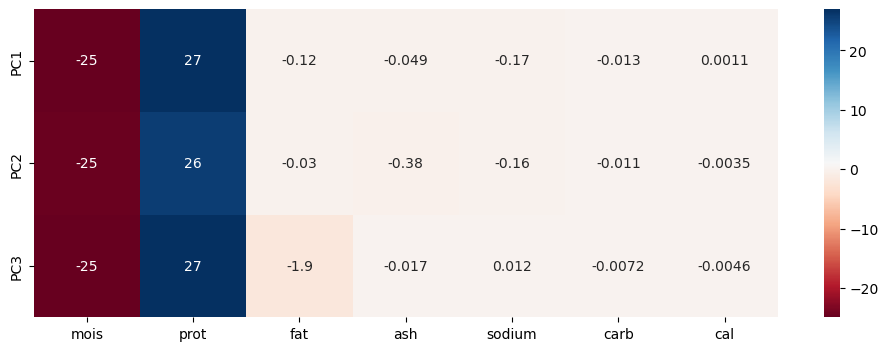

In [41]:
fig, axis = plt.subplots(figsize=(12,4))
three_rows = new_coords.head(3)
sb.heatmap(three_rows, annot=True, ax=axis, cmap='RdBu')
axis.set_xticklabels(X.columns)
axis.set_yticklabels(['PC1','PC2','PC3'])
plt.show()

In [42]:
print(pca_pizza.explained_variance_ratio_)

[7.80101075e-01 1.88406607e-01 3.11331933e-02 3.41259703e-04
 1.54946266e-05 1.91915626e-06 4.51182455e-07]


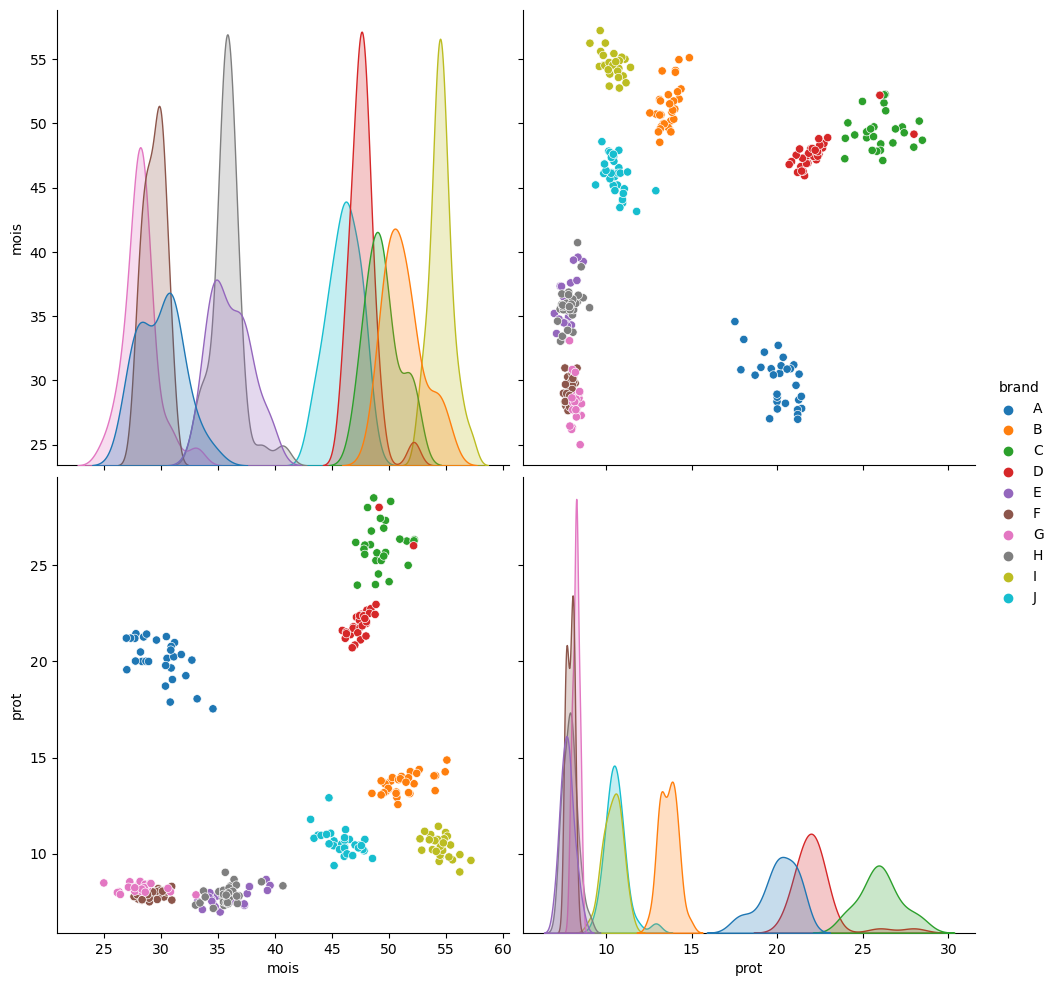

In [43]:
sb.pairplot(pizza_data[['mois','prot', 'brand']], 
             hue="brand", height=5)

## PCA from Scratch